In [28]:
import math
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt

data_file = pd.ExcelFile("Phillips.xls")

data_to_plot = pd.read_excel(data_file, "final_results")
data_to_plot

,Year,avg_unrate,unrate_gap,compensation,gdp_deflator,cpi
0,1980,7.175000,1.175000,1.111816,1.005846,0.758321
1,1981,7.616667,1.616667,-2.597034,-1.093369,-2.382405
2,1982,9.708333,3.708333,-1.657406,-3.096975,-4.720973
3,1983,9.600000,3.600000,-2.851835,-1.809258,0.201817
4,1984,7.508333,1.508333,0.827315,0.185553,0.171607
5,1985,7.191667,1.191667,1.146680,-0.711512,-0.580044
6,1986,7.000000,1.000000,-0.421284,-0.962230,-0.518245
7,1987,6.175000,0.175000,-1.798635,1.050281,0.369199
8,1988,5.491667,-0.508333,1.540472,0.935939,0.479224
9,1989,5.258333,-0.741667,-1.882455,-0.268600,-0.198568


# Question 3, plot from year 1980 to 1994

We want to show that there is an inverse relation between unemployment rate and (some expression, here the derivative) of inflation.

The unemployment rate gap is defined to be the average yearly unemployment rate minus the (assumed) natural rate of unemployment, i.e.
$$\sum_{i=1}^{12}\frac{\text{unemployment rate at month }i}{12}-\text{NAIRU}.$$

We use three different ways to represent change of inflation, compensation, gdp deflator, and CPI.

The data plotted is the change in the rate of change of inflation, i.e, $$\Delta_t = \pi_t - \pi_{t-1},$$ where, using CPI for example, $\pi_t$ is defined to be $$\pi_t = \frac{CPI_t - CPI_{t-1}}{CPI_{t-1}}.$$

Data are prepocessed in this way in the attached excel file.

In [29]:
import matplotlib.pyplot as plt

data3 = data_to_plot[data_to_plot["Year"]<=1994]
data3

,Year,avg_unrate,unrate_gap,compensation,gdp_deflator,cpi
0,1980,7.175000,1.175000,1.111816,1.005846,0.758321
1,1981,7.616667,1.616667,-2.597034,-1.093369,-2.382405
2,1982,9.708333,3.708333,-1.657406,-3.096975,-4.720973
3,1983,9.600000,3.600000,-2.851835,-1.809258,0.201817
4,1984,7.508333,1.508333,0.827315,0.185553,0.171607
5,1985,7.191667,1.191667,1.146680,-0.711512,-0.580044
6,1986,7.000000,1.000000,-0.421284,-0.962230,-0.518245
7,1987,6.175000,0.175000,-1.798635,1.050281,0.369199
8,1988,5.491667,-0.508333,1.540472,0.935939,0.479224
9,1989,5.258333,-0.741667,-1.882455,-0.268600,-0.198568


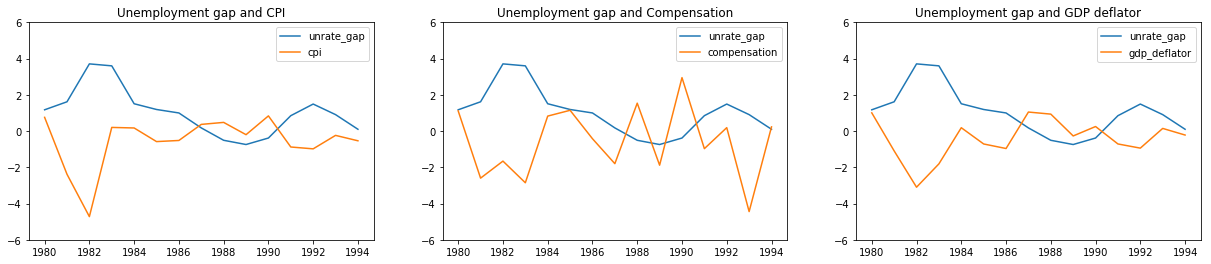

In [30]:
plt.figure(figsize=(21,4))
plt.subplot(1,3,1)
plt.plot(data3["Year"], data3["unrate_gap"])
plt.plot(data3["Year"], data3["cpi"])
plt.ylim([-6,6])
plt.legend()
plt.title("Unemployment gap and CPI")

plt.subplot(1,3,2)
plt.plot(data3["Year"], data3["unrate_gap"])
plt.plot(data3["Year"], data3["compensation"])
plt.ylim([-6,6])
plt.legend()
plt.title("Unemployment gap and Compensation")

plt.subplot(1,3,3)
plt.plot(data3["Year"], data3["unrate_gap"])
plt.plot(data3["Year"], data3["gdp_deflator"])
plt.ylim([-6,6])
plt.legend()
plt.title("Unemployment gap and GDP deflator")

plt.show()

# Question 4
The author wants to make the point that the unemployment gap (positive when unemployment is higher that its natural level, negative when it is below its natural level) is approximately equal to the change in inflation rate but with opposite sign. Does figure 1 support that point? Does your reconstruction of figure 1 support that point?

### Yes.  Yes.

# Question 5, plot from year 1985 to 2018

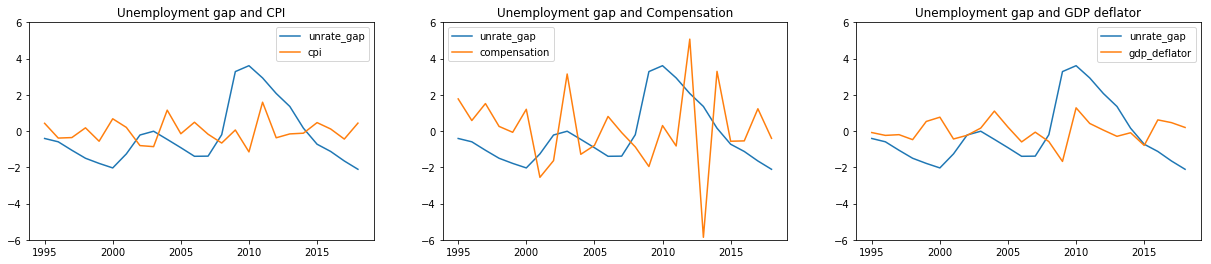

In [31]:
data5 = data_to_plot[data_to_plot["Year"]>1994]
plt.figure(figsize=(21,4))
plt.subplot(1,3,1)
plt.plot(data5["Year"], data5["unrate_gap"])
plt.plot(data5["Year"], data5["cpi"])
plt.ylim([-6,6])
plt.legend()
plt.title("Unemployment gap and CPI")

plt.subplot(1,3,2)
plt.plot(data5["Year"], data5["unrate_gap"])
plt.plot(data5["Year"], data5["compensation"])
plt.ylim([-6,6])
plt.legend()
plt.title("Unemployment gap and Compensation")

plt.subplot(1,3,3)
plt.plot(data5["Year"], data5["unrate_gap"])
plt.plot(data5["Year"], data5["gdp_deflator"])
plt.ylim([-6,6])
plt.legend()
plt.title("Unemployment gap and GDP deflator")

plt.show()

# Question 6, data from 1960-1993

Data are processed in this way:
First, the four monthly values in one quarter are averaged to get the CPI for this particular quarter. 
The difference between the CPI of the current quarter and that of the previous quarter is the term $t_0.$ All lagged terms are lagged accordingly, with a total of 12 lags.
Similarly for $unrate$, $unrate_1,$ and $unrate_2.$
The $d_oil_price_rate$ is the rate of change of quarterly oil price. Quarterly oil price is calculated by averaging the four monthly prices within a quarter. Then the rate of change is calculated.

These are done in the attached excel file.

In [32]:
regression_data1 = pd.read_excel(data_file, "regress_data1")


import statsmodels.api as sm
regression_data1 = sm.add_constant(regression_data1)

xvars = ["const", "t1","t2","t3","t4","t5","t6","t7","t8","t9","t10","t11","t12","unrate1","unrate2","d_oil_price_rate"]
reg1 = sm.OLS(endog=regression_data1['t0'], exog=regression_data1[xvars]).fit()
regression_data1

,const,Year,Quarter,CPI,t0,t1,t2,t3,t4,t5,...,t8,t9,t10,t11,t12,unrate,unrate1,unrate2,oil_price,d_oil_price_rate
0,1.0,1960,Qtr2,30.633333,0.066667,0.133333,0.200000,0.133333,0.166667,0.133333,...,0.133333,0.133333,0.233333,0.200000,0.233333,5.233333,5.133333,5.600000,2.970000,0.000000
1,1.0,1960,Qtr3,30.600000,-0.033333,0.066667,0.133333,0.200000,0.133333,0.166667,...,0.100000,0.133333,0.133333,0.233333,0.200000,5.533333,5.233333,5.133333,2.970000,0.000000
2,1.0,1960,Qtr4,30.766667,0.166667,-0.033333,0.066667,0.133333,0.200000,0.133333,...,0.166667,0.100000,0.133333,0.133333,0.233333,6.266667,5.533333,5.233333,2.970000,0.000000
3,1.0,1961,Qtr1,30.833333,0.066667,0.166667,-0.033333,0.066667,0.133333,0.200000,...,0.133333,0.166667,0.100000,0.133333,0.133333,6.800000,6.266667,5.533333,2.970000,0.000000
4,1.0,1961,Qtr2,30.933333,0.100000,0.066667,0.166667,-0.033333,0.066667,0.133333,...,0.166667,0.133333,0.166667,0.100000,0.133333,7.000000,6.800000,6.266667,2.970000,0.000000
5,1.0,1961,Qtr3,31.066667,0.133333,0.100000,0.066667,0.166667,-0.033333,0.066667,...,0.133333,0.166667,0.133333,0.166667,0.100000,6.766667,7.000000,6.800000,2.970000,0.000000
6,1.0,1961,Qtr4,31.166667,0.100000,0.133333,0.100000,0.066667,0.166667,-0.033333,...,0.200000,0.133333,0.166667,0.133333,0.166667,6.200000,6.766667,7.000000,2.970000,0.000000
7,1.0,1962,Qtr1,31.233333,0.066667,0.100000,0.133333,0.100000,0.066667,0.166667,...,0.133333,0.200000,0.133333,0.166667,0.133333,5.633333,6.200000,6.766667,2.970000,0.000000
8,1.0,1962,Qtr2,31.366667,0.133333,0.066667,0.100000,0.133333,0.100000,0.066667,...,0.066667,0.133333,0.200000,0.133333,0.166667,5.533333,5.633333,6.200000,2.970000,0.000000
9,1.0,1962,Qtr3,31.466667,0.100000,0.133333,0.066667,0.100000,0.133333,0.100000,...,-0.033333,0.066667,0.133333,0.200000,0.133333,5.566667,5.533333,5.633333,2.970000,0.000000


In [33]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     t0   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     45.65
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           4.27e-42
Time:                        18:38:11   Log-Likelihood:                -2.6656
No. Observations:                 135   AIC:                             37.33
Df Residuals:                     119   BIC:                             83.82
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1929      0.123      1.566      0.120      -0.051       0.437
t1                   0.4338      0.087      4.993      0.000       0.262       0.606
t2                   0.2767      0.099      2.785      0.006       0.080       0.473
t3                   0.3485      0.096      3.613      0.000       0.157       0.539
t4                  -0.0572      0.099     -0.581      0.563      -0.252       0.138
t5                   0.0216      0.098      0.220      0.826      -0.172       0.215
t6                   0.1050      0.098      1.071      0.286      -0.089       0.299
t7                  -0.0236      0.098     -0.241      0.810      -0.218       0.170
t8                  -0.1724      0.098     -1.760      0.081      -0.366       0.022
t9                   0.2189      0.098      2.228      0.028       0.024       0.413
t10                 -0.0451      0.097     -0.467      0.642      -0.237       0.146
t11                  0.0924      0.096      0.959      0.340      -0.098       0.283
t12                 -0.2004      0.086     -2.335      0.021      -0.370      -0.030
unrate1             -0.3899      0.077     -5.047      0.000      -0.543      -0.237
unrate2              0.3596      0.079      4.568      0.000       0.204       0.515
d_oil_price_rate     0.2328      0.156      1.491      0.139      -0.076       0.542
==============================================================================
Omnibus:                       16.852   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.447
Skew:                           0.265   Prob(JB):                     5.53e-13
Kurtosis:                       6.123   Cond. No.                         67.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Don't know how to add a constraint s.t. the coeffs of ti's sum up to 1
The result looks similar to the regression result in the paper. The result is stable as most of the t-stats are significant. As is claimed in the paper, the sum of the two coefficients of unemployment rates is negative (-0.03), so a decrease in unemployment rate will lead to inflation.

In [34]:
np.abs(0.1929/(-0.3899+0.3596))

6.366336633663356

Yes, just by looking at the number, this is a pretty good estimate of natural rate of unemployment.

# Question 7, data from 1994Q1 to recent

In [35]:
regression_data2 = pd.read_excel(data_file, "regress_data2")


import statsmodels.api as sm
regression_data2 = sm.add_constant(regression_data2)

xvars = ["const", "t1","t2","t3","t4","t5","t6","t7","t8","t9","t10","t11","t12","unrate1","unrate2","d_oil_price_rate"]
reg2 = sm.OLS(endog=regression_data2['t0'], exog=regression_data2[xvars]).fit()

In [36]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     t0   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     3.248
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           0.000294
Time:                        18:38:27   Log-Likelihood:                 5.8380
No. Observations:                 100   AIC:                             20.32
Df Residuals:                      84   BIC:                             62.01
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.0709      0.317      3.381      0.001       0.441       1.701
t1                   0.3032      0.107      2.833      0.006       0.090       0.516
t2                   0.1478      0.111      1.334      0.186      -0.072       0.368
t3                   0.1086      0.115      0.945      0.347      -0.120       0.337
t4                  -0.2715      0.117     -2.320      0.023      -0.504      -0.039
t5                   0.1150      0.120      0.957      0.341      -0.124       0.354
t6                  -0.0798      0.123     -0.647      0.519      -0.325       0.166
t7                   0.1376      0.130      1.058      0.293      -0.121       0.396
t8                  -0.1463      0.130     -1.129      0.262      -0.404       0.111
t9                   0.0216      0.124      0.173      0.863      -0.226       0.269
t10                 -0.1458      0.124     -1.176      0.243      -0.392       0.101
t11                  0.0933      0.119      0.782      0.436      -0.144       0.330
t12                 -0.0819      0.110     -0.744      0.459      -0.301       0.137
unrate1             -0.1164      0.093     -1.256      0.213      -0.301       0.068
unrate2              0.0758      0.095      0.797      0.428      -0.113       0.265
d_oil_price_rate     0.2902      0.191      1.519      0.133      -0.090       0.670
==============================================================================
Omnibus:                        8.347   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.612
Skew:                          -0.536   Prob(JB):                       0.0135
Kurtosis:                       3.958   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

They have some difference, but the big picture is similar.
###### One remarkable difference is that constant/sum of coeff of unrates is very high, as this time the intercept is large.
###### Also, $R^2$ decreased by a lot.

# Question 8 Redo the fit in question 6 leaving out the two lagged unemployment rates.

In [37]:
regression_data3 = pd.read_excel(data_file, "regress_data1")


import statsmodels.api as sm
regression_data3 = sm.add_constant(regression_data3)

xvars2 = ["const", "t1","t2","t3","t4","t5","t6","t7","t8","t9","t10","t11","t12","d_oil_price_rate"]
reg3 = sm.OLS(endog=regression_data3['t0'], exog=regression_data3[xvars2]).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     t0   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     42.26
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           1.04e-38
Time:                        18:38:30   Log-Likelihood:                -16.042
No. Observations:                 135   AIC:                             60.08
Df Residuals:                     121   BIC:                             100.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0744      0.045      1.651      0.101      -0.015       0.164
t1                   0.5510      0.091      6.078      0.000       0.371       0.730
t2                   0.1588      0.104      1.528      0.129      -0.047       0.365
t3                   0.2805      0.104      2.685      0.008       0.074       0.487
t4                  -0.1255      0.107     -1.175      0.242      -0.337       0.086
t5                   0.0078      0.107      0.073      0.942      -0.204       0.219
t6                   0.1164      0.107      1.089      0.279      -0.095       0.328
t7                  -0.0318      0.107     -0.298      0.766      -0.243       0.180
t8                  -0.1676      0.107     -1.569      0.119      -0.379       0.044
t9                   0.1875      0.107      1.747      0.083      -0.025       0.400
t10                 -0.0054      0.105     -0.052      0.959      -0.213       0.202
t11                  0.1033      0.105      0.982      0.328      -0.105       0.312
t12                 -0.1530      0.092     -1.658      0.100      -0.336       0.030
d_oil_price_rate     0.2591      0.171      1.517      0.132      -0.079       0.597
==============================================================================
Omnibus:                       22.035   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.310
Skew:                          -0.358   Prob(JB):                     3.32e-21
Kurtosis:                       7.031   Cond. No.                         26.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It is still a good fit.

# Question 9 Use the actual core inflation rates and fitted values from question 6 to recreate the author's figure 2.

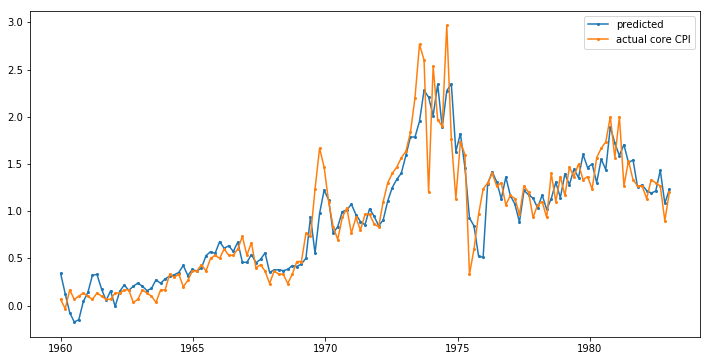

In [38]:
predicted_value = reg1.predict(regression_data1[xvars])
timevec = np.linspace(1960,1983,len(regression_data1))
plt.figure(figsize=(12,6))
plt.plot(timevec, predicted_value,"-o", markersize = 2, label = "predicted")
plt.plot(timevec, regression_data1["t0"], "-o", markersize=2, label = "actual core CPI")
plt.legend()
plt.show()

This looks to be a good fit. Though at the beginning part of the graph there are some inconsistencies, the fitting gets better as the period goes on. Also, observe that the fit lines up with the actual consistently one month late in moves.

# Question 10
### Reproduce figure 2 for the period from 1994Q1 to the present. That is, you're still using the coefficients from question 6, based on data from 1960Q2 to 1993Q4, but applying the model to data from 1994Q1 to 2017Q2.

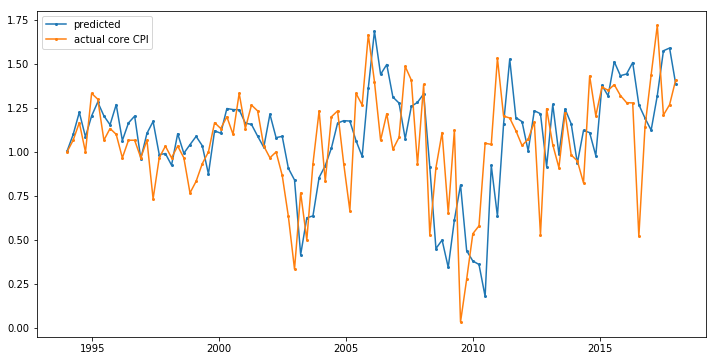

In [39]:
predicted_value2 = reg1.predict(regression_data2[xvars])
plt.figure(figsize=(12,6))
timevec = np.linspace(1994,2018,len(regression_data2))
plt.plot(timevec, predicted_value2, "-o", markersize = 2,label = "predicted")
plt.plot(timevec, regression_data2["t0"],"-o", markersize = 2, label = "actual core CPI")
plt.legend()
plt.show()

The fit is not as good as the previous one. However, the one-month lag between the fit and the actual still exists.

# Question 11
What is the regression Beta of actual values on fitted values for the in-sample period from 1960Q2 to 1993Q4? How about for the out-of-sample period 1994Q1 to 2017Q2? Answer the same questions for the model without the two lagged unemployment rates. What does this suggest about the value of the lagged unemployment rates in predicting inflation?

Recall that the beta (standardized) coefficients can be calculated as $$b^{\prime}_k = b_k \cdot \frac{S_{x_k}}{S_y} .$$

In [40]:
beta_coeff = pd.Series(reg1.params)
endo_se = np.std(reg1.predict(regression_data1[xvars]))
beta_coeff = beta_coeff * endo_se / reg1.bse.values
beta_coeff

const               0.927027
t1                  2.955681
t2                  1.648892
t3                  2.138626
t4                 -0.343659
t5                  0.130407
t6                  0.634003
t7                 -0.142940
t8                 -1.041856
t9                  1.319057
t10                -0.276264
t11                 0.567542
t12                -1.382548
unrate1            -2.987704
unrate2             2.704480
d_oil_price_rate    0.882525
dtype: float64

# Question 12
For each quarter compute actual value minus previous quarter's actual value, and fitted value minus previous quarter's actual value (notice that we subtract previous quarter's actual value both times, why?). Compute the correlation between these for both the in-sample and out-of-sample periods, for both the author's model and the same model without the lagged unemployment variables. What does this suggest?

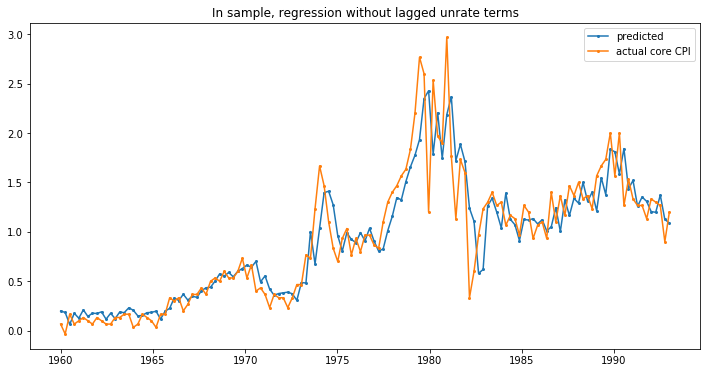

In [41]:
# use the regression without the two lagged terms of unemployment, compare fitted values.

predicted_value_without_unrate1 = reg3.predict(regression_data3[xvars2])
plt.figure(figsize=(12,6))
timevec = np.linspace(1960,1993,len(regression_data3))
plt.plot(timevec, predicted_value_without_unrate1, "-o", markersize = 2,label = "predicted")
plt.plot(timevec, regression_data3["t0"],"-o", markersize = 2, label = "actual core CPI")
plt.title("In sample, regression without lagged unrate terms")
plt.legend()
plt.show()

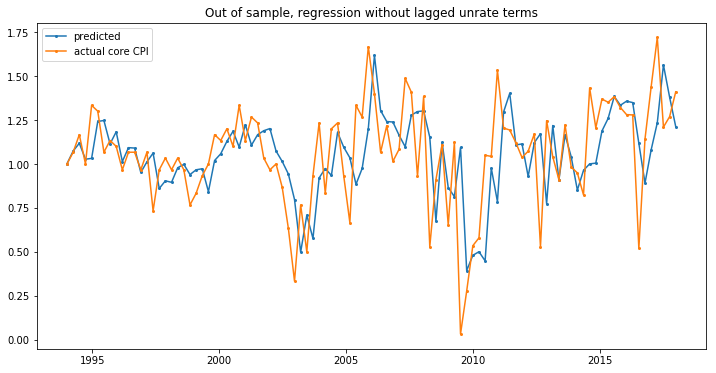

In [43]:
predicted_value_without_unrate2 = reg3.predict(regression_data2[xvars2])
plt.figure(figsize=(12,6))
timevec = np.linspace(1994,2018,len(regression_data2))
plt.plot(timevec, predicted_value_without_unrate2, "-o", markersize = 2,label = "predicted")
plt.plot(timevec, regression_data2["t0"],"-o", markersize = 2, label = "actual core CPI")
plt.title("Out of sample, regression without lagged unrate terms")
plt.legend()
plt.show()